# Forecast Exchange Rates

## Importing Library

In [1]:
#VIZ AND DATA MANIPULATION LIBRARY
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import math
#numpy
from numpy import array

#warnings
import warnings 
warnings.filterwarnings('ignore')

#Library
from sklearn.preprocessing import MinMaxScaler

#Defining the LSTM model
from keras.models import Sequential
from keras.layers import Dense,LSTM

#METRICS
from sklearn.metrics import mean_squared_error



## Loading Data

In [2]:
inrusd = pd.read_csv('Dataset.csv',parse_dates=["observation_date"])
inrusd.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


### Copy Data

In [3]:
#Copy Data
df = inrusd.copy()
df.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


#### Shape

In [4]:
df.shape

(12649, 2)

#### Renaming 

In [5]:
#renaming the date and rate
data = df[['observation_date', 'DEXINUS']]
data.columns = ['date', 'rate']

In [6]:
data.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


#### info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


Converting rates to numeric

In [8]:
data['rate'] = pd.to_numeric(data.rate)

Sorting Date in Ascending order

In [9]:
data = data.sort_values('date', ascending=True)

#### Descriptive Stats

In [10]:
data.rate.describe()

count    12155.000000
mean        34.206133
std         21.089190
min          7.190000
25%         12.075000
50%         35.890000
75%         47.650000
max         76.950000
Name: rate, dtype: float64

#### Checking Null Values

In [11]:
data.isnull().sum()

date      0
rate    494
dtype: int64

Forward Filling Null Values

In [12]:
#Forward Filling
data.fillna(method='ffill', inplace=True)

In [13]:
data.isnull().sum()

date    0
rate    0
dtype: int64

Convert datatype int to float

In [14]:
#transformation of values to float
data['rate'] = pd.to_numeric(data['rate'], downcast="float")

#### info

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12649 non-null  float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 247.1 KB


#### Checking Duplicates

In [16]:
data.duplicated().sum()

0

No Duplicates found

### Final Data

In [17]:
final_data = data.copy()

In [18]:
final_data.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [19]:
data1 = data.copy()

In [20]:
#data1 = data.set_index('date')

In [21]:
data1.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [22]:
final_data1 = data1.copy()

### Segregating Years, Months, Day

In [23]:
#copy data 
df1 = final_data.copy()

In [24]:
#if date is not set to index then use 
#Years
df1['Year']= [i.year for i in df1['date']]
#Months
df1['Month']= [i.month for i in df1['date']]
#Days
df1['Day']= [i.day for i in df1['date']]

In [25]:
#Date is set to index
#Years
#df1['Year']= df1.index.year
#Months
#df1['Month']= df1.index.month
#Days
#df1['Day']= df1.index.day

In [26]:
df1.head()

,date,rate,Year,Month,Day
0,1973-01-02,8.02,1973,1,2
1,1973-01-03,8.02,1973,1,3
2,1973-01-04,8.00,1973,1,4
3,1973-01-05,8.01,1973,1,5
4,1973-01-08,8.00,1973,1,8


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 0 to 12648
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12649 non-null  float32       
 2   Year    12649 non-null  int64         
 3   Month   12649 non-null  int64         
 4   Day     12649 non-null  int64         
dtypes: datetime64[ns](1), float32(1), int64(3)
memory usage: 543.5 KB


## Visialization

### Line Plot

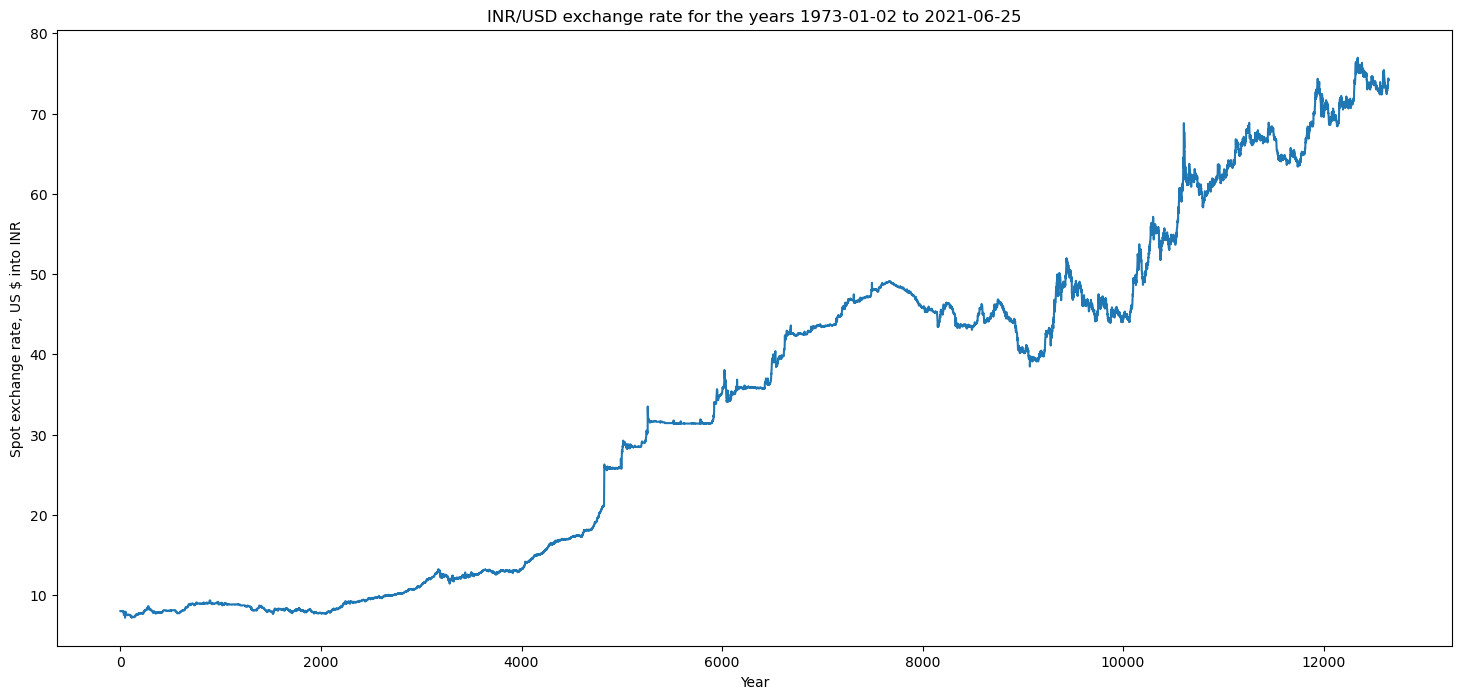

In [28]:
#Line Plot
plt.figure(figsize =(18,8),dpi=100)
df1.rate.plot()
plt.ylabel('Spot exchange rate, US \$ into INR')
plt.xlabel('Year')
plt.title('INR/USD exchange rate for the years 1973-01-02 to 2021-06-25')
plt.show()

### Line Plot on 10 years interval

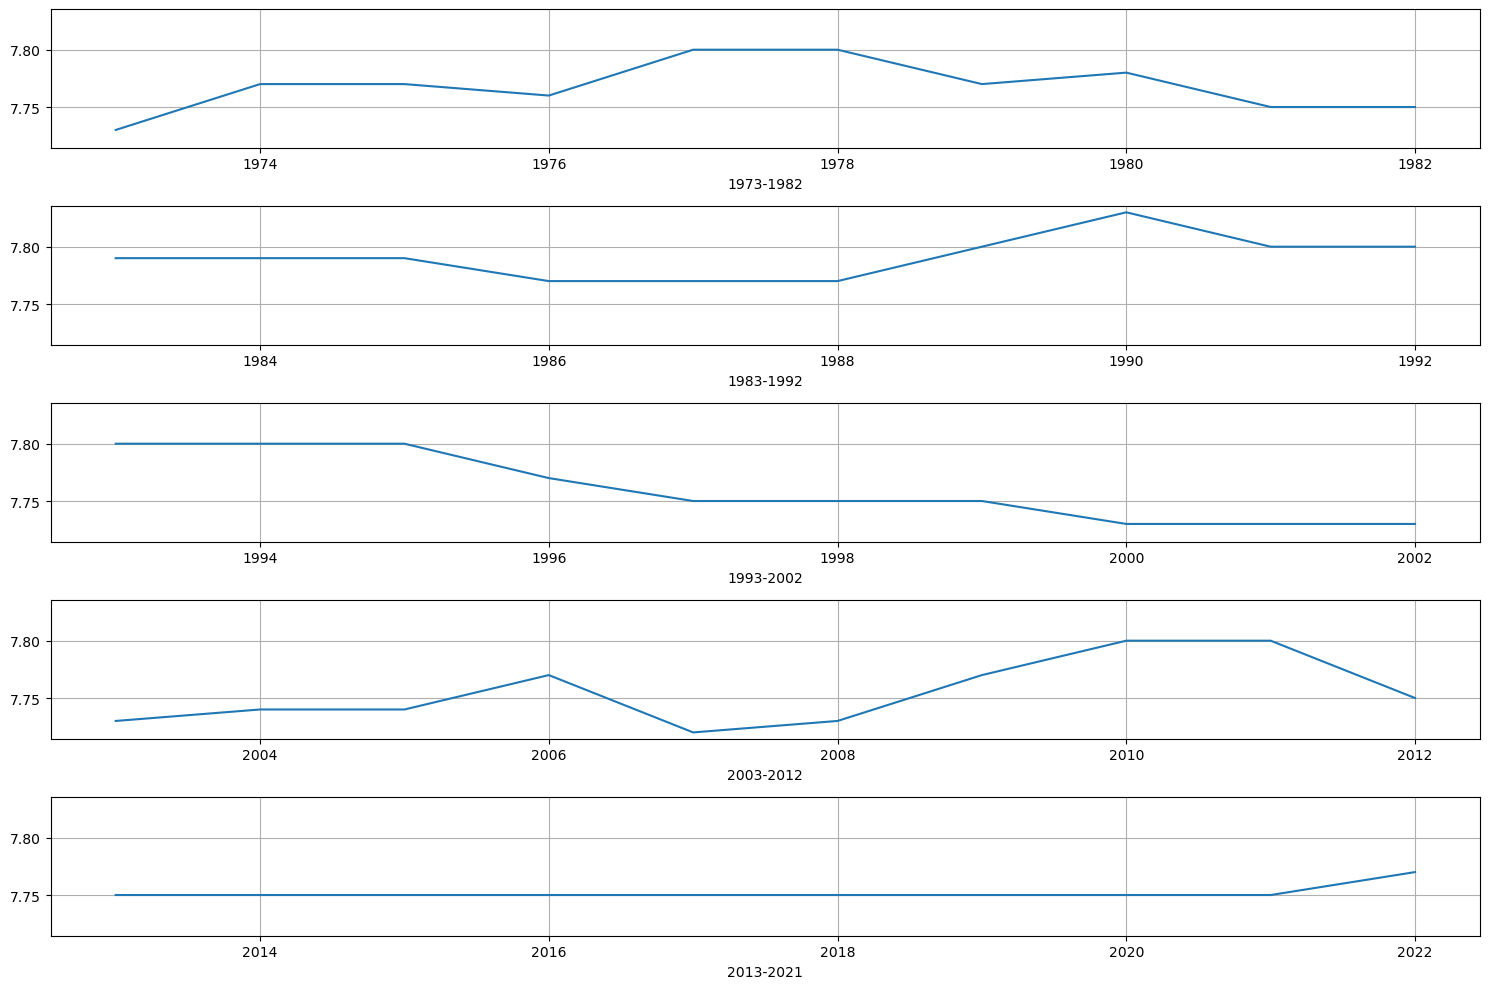

In [29]:
fig, ax = plt.subplots(5, 1, figsize=(15, 10), sharey=True)
df1.loc['1973':'1982']['rate'].plot(xlabel="1973-1982",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
df1.loc['1983':'1992']['rate'].plot(xlabel="1983-1992",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
df1.loc['1993':'2002']['rate'].plot(xlabel="1993-2002",
                                                ax=ax[2],
                                                grid=True)
df1.loc['2003':'2012']['rate'].plot(xlabel="2003-2012",
                                                ax=ax[3],
                                                grid=True)
df1.loc['2013':'2022']['rate'].plot(xlabel="2013-2021",
                                                ax=ax[4],
                                                grid=True)
plt.tight_layout()
plt.show()

### Box Plot

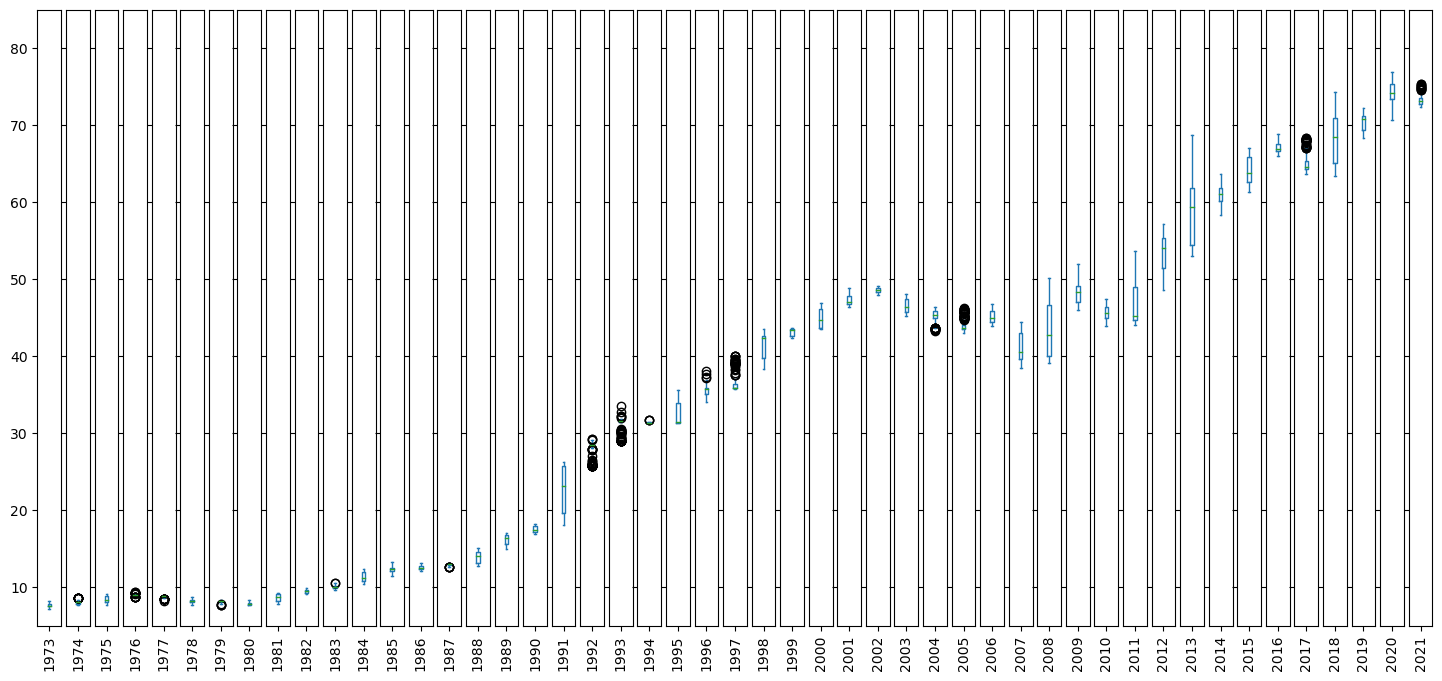

In [30]:
box1 = df1.groupby('Year')

years = list(np.unique(df1.Year))

fig, ax = plt.subplots(1, len(years), figsize=(18, 8), sharey=True)
for i, year in enumerate(years):
    X = box1.get_group(year)
    # subplots=True,layout=(1,len(A)),figsize=(18,8),use_index = True,
    X.plot(y='rate',
           kind='box',
           ax=ax[i],
           label=year,
           rot=90,
           ylim=(5, 85),
           sharey=True)
    plt.tight_layout
#plt.title('box plot');
plt.show()

### Box Plot with 5 years interval

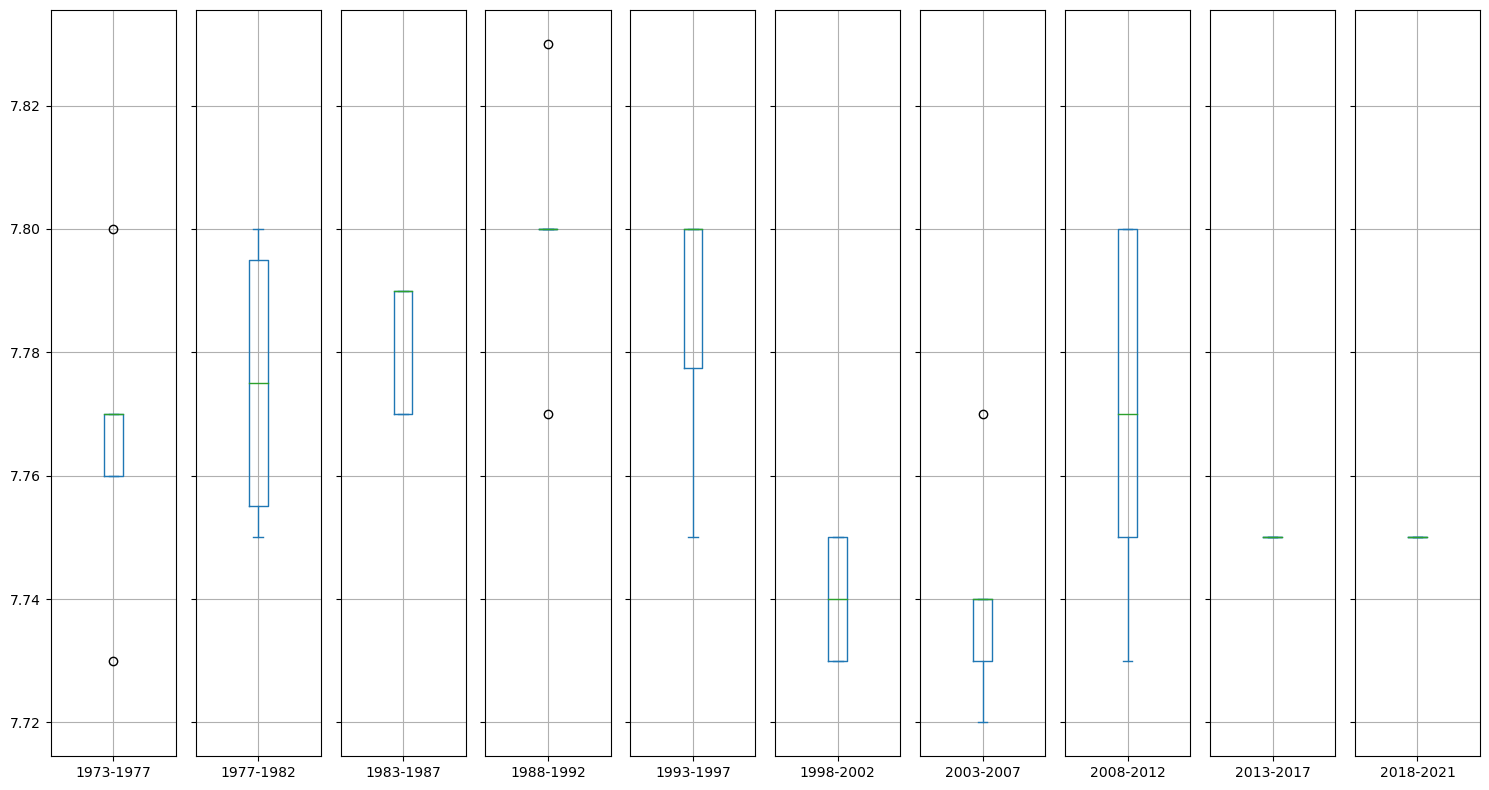

In [31]:
fig, ax = plt.subplots(1, 10, figsize=(15, 8), sharey=True)
df1.loc['1973':'1977']['rate'].plot(kind='box',
                                                label="1973-1977",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
df1.loc['1977':'1982']['rate'].plot(kind='box',
                                                label="1977-1982",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
df1.loc['1983':'1987']['rate'].plot(kind='box',
                                                label="1983-1987",
                                                stacked=True,
                                                ax=ax[2],
                                                grid=True)
df1.loc['1988':'1992']['rate'].plot(kind='box',
                                                label="1988-1992",
                                                stacked=True,
                                                ax=ax[3],
                                                grid=True)
df1.loc['1992':'1997']['rate'].plot(kind='box',
                                                label="1993-1997",
                                                ax=ax[4],
                                                grid=True)
df1.loc['1997':'2002']['rate'].plot(kind='box',
                                                label="1998-2002",
                                                ax=ax[5],
                                                grid=True)
df1.loc['2003':'2007']['rate'].plot(kind='box',
                                                label="2003-2007",
                                                ax=ax[6],
                                                grid=True)
df1.loc['2008':'2012']['rate'].plot(kind='box',
                                                label="2008-2012",
                                                ax=ax[7],
                                                grid=True)
df1.loc['2013':'2017']['rate'].plot(kind='box',
                                                label="2013-2017",
                                                ax=ax[8],
                                                grid=True)
df1.loc['2018':'2021']['rate'].plot(kind='box',
                                                label="2018-2021",
                                                ax=ax[9],
                                                grid=True)
plt.tight_layout()
plt.show()

## LSTM

In [32]:
data1 = data.iloc[10000:]

In [33]:
data2 = data1.copy() 

In [34]:
print('Start Date:', data2.head(1))
print('---------------------------------')
print('End Date:', data2.tail(1))

Start Date:             date       rate
10000 2011-05-03  44.470001
---------------------------------
End Date:             date       rate
12648 2021-06-25  74.139999


In [35]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2649 entries, 10000 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2649 non-null   datetime64[ns]
 1   rate    2649 non-null   float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 51.7 KB


In [36]:
df1=data2.reset_index()['rate']

In [37]:
df1

0       44.470001
1       44.349998
2       44.759998
3       44.720001
4       44.680000
          ...    
2644    74.180000
2645    74.370003
2646    74.129997
2647    74.139999
2648    74.139999
Name: rate, Length: 2649, dtype: float32

### MinMaxScaler

In [38]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [39]:
df1

array([[0.01336586],
       [0.00972056],
       [0.02217495],
       ...,
       [0.9143379 ],
       [0.9146416 ],
       [0.9146416 ]], dtype=float32)

### Splitting

In [40]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [41]:
training_size,test_size

(1854, 795)

In [42]:
# convertsion of an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [43]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [44]:
print(X_train.shape), print(y_train.shape)

(1753, 100)
(1753,)


(None, None)

In [45]:
print(X_test.shape), print(ytest.shape)

(694, 100)
(694,)


(None, None)

In [46]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Model

In [47]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
28/28 [==============================] - 23s 190ms/step - loss: 0.0907 - val_loss: 0.0067
Epoch 2/100
28/28 [==============================] - 3s 112ms/step - loss: 0.0032 - val_loss: 0.0067
Epoch 3/100
28/28 [==============================] - 3s 106ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 4/100
28/28 [==============================] - 3s 113ms/step - loss: 6.4468e-04 - val_loss: 0.0011
Epoch 5/100
28/28 [==============================] - 4s 156ms/step - loss: 6.6383e-04 - val_loss: 7.1212e-04
Epoch 6/100
28/28 [==============================] - 4s 127ms/step - loss: 6.8118e-04 - val_loss: 9.5133e-04
Epoch 7/100
28/28 [==============================] - 3s 105ms/step - loss: 6.1540e-04 - val_loss: 6.6815e-04
Epoch 8/100
28/28 [==============================] - 3s 107ms/step - loss: 6.2395e-04 - val_loss: 7.8858e-04
Epoch 9/100
28/28 [==============================] - 4s 137ms/step - loss: 6.8380e-04 - val_loss: 6.6394e-04
Epoch 10/100
28/28 [==========================

Epoch 76/100
28/28 [==============================] - 4s 128ms/step - loss: 2.1069e-04 - val_loss: 2.2932e-04
Epoch 77/100
28/28 [==============================] - 4s 130ms/step - loss: 1.8293e-04 - val_loss: 1.5591e-04
Epoch 78/100
28/28 [==============================] - 4s 160ms/step - loss: 1.7608e-04 - val_loss: 2.3379e-04
Epoch 79/100
28/28 [==============================] - 4s 136ms/step - loss: 1.6601e-04 - val_loss: 1.8084e-04
Epoch 80/100
28/28 [==============================] - 3s 103ms/step - loss: 1.8184e-04 - val_loss: 4.1518e-04
Epoch 81/100
28/28 [==============================] - 3s 104ms/step - loss: 1.7565e-04 - val_loss: 4.1150e-04
Epoch 82/100
28/28 [==============================] - 4s 131ms/step - loss: 1.9794e-04 - val_loss: 1.4638e-04
Epoch 83/100
28/28 [==============================] - 4s 155ms/step - loss: 2.0519e-04 - val_loss: 1.9262e-04
Epoch 84/100
28/28 [==============================] - 3s 114ms/step - loss: 1.4472e-04 - val_loss: 1.3858e-04
Epoch 85/1

In [50]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [51]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

#### RMSE

In [52]:
### Calculate RMSE performance metrics
print('Train Prediction')
math.sqrt(mean_squared_error(y_train,train_predict))

Train Prediction


61.348030209183364

In [53]:
### Test Data RMSE
print('Test Prediction')
math.sqrt(mean_squared_error(ytest,test_predict))

Test Prediction


71.76555866260814

#### Visualization

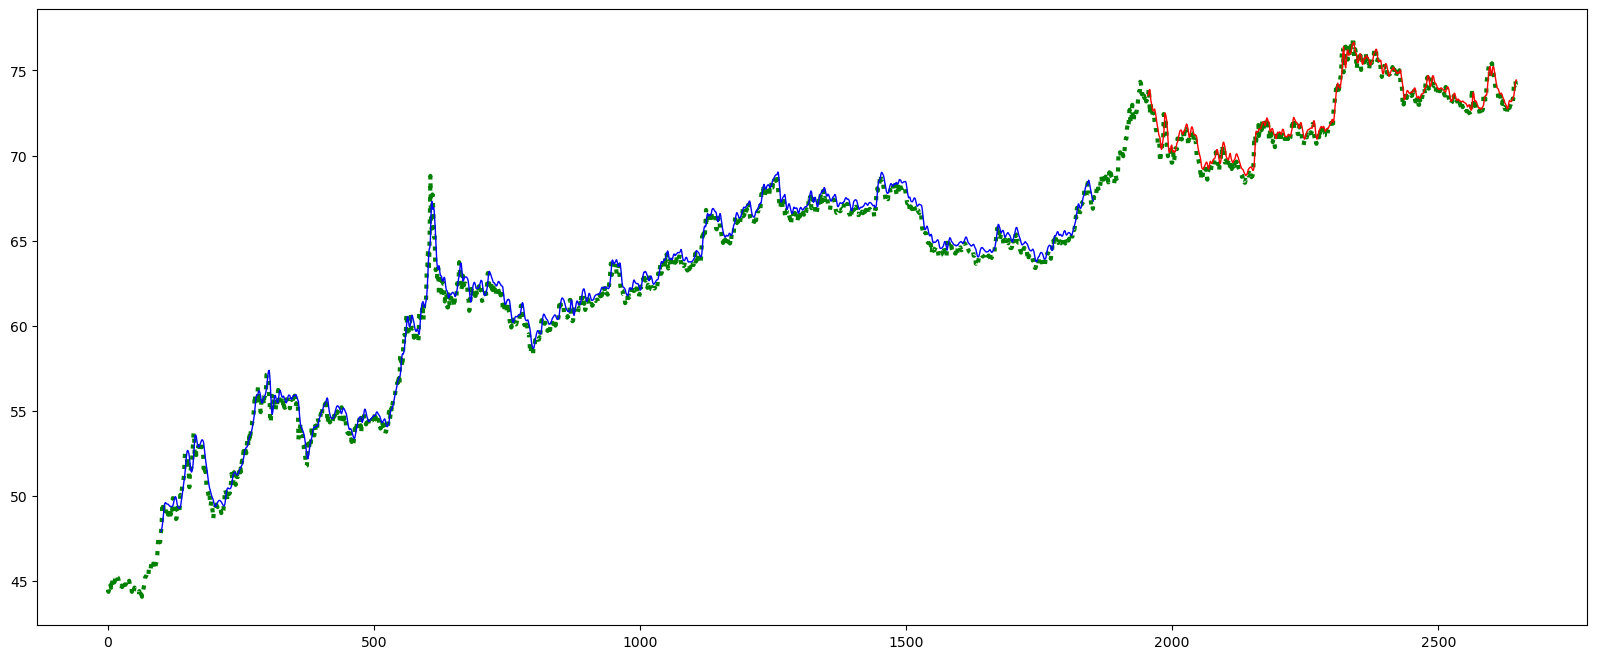

In [54]:
### Plotting 
# shift train predictions for plotting
plt.figure(figsize=(20,8))
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label = 'Actual', color = 'g', linewidth=3, linestyle='dotted')
plt.plot(trainPredictPlot, label = 'Actual', color = 'b', linewidth=1)
plt.plot(testPredictPlot, label = 'Actual', color = 'r', linewidth=1)
plt.show()

In [55]:
len_test_data = len(test_data)
len_test_data

795

In [56]:
x_input=test_data[(len_test_data - look_back):].reshape(1,-1)
x_input.shape
#794-100

(1, 100)

In [57]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [58]:
temp_input

[0.8769745826721191,
 0.8748483657836914,
 0.8745443820953369,
 0.8705956935882568,
 0.8678615093231201,
 0.8678615093231201,
 0.8757596015930176,
 0.8742406368255615,
 0.8693804740905762,
 0.8648238182067871,
 0.8642165660858154,
 0.8630013465881348,
 0.8611786365509033,
 0.8721141815185547,
 0.9079587459564209,
 0.8921630382537842,
 0.8888216018676758,
 0.8754556179046631,
 0.8718106746673584,
 0.8863914012908936,
 0.889732837677002,
 0.8766708374023438,
 0.8757596015930176,
 0.8705956935882568,
 0.8712029457092285,
 0.8672540187835693,
 0.8654313087463379,
 0.8666465282440186,
 0.8687727451324463,
 0.8633050918579102,
 0.860875129699707,
 0.8654313087463379,
 0.8675577640533447,
 0.8705956935882568,
 0.8693804740905762,
 0.8724181652069092,
 0.8936817646026611,
 0.8842649459838867,
 0.889732837677002,
 0.891251802444458,
 0.8888216018676758,
 0.8948967456817627,
 0.9210207462310791,
 0.9277036190032959,
 0.932260274887085,
 0.9416768550872803,
 0.9489672183990479,
 0.942892074584960

### 30 days future Prediction

In [59]:
# demonstrate prediction for next 30 days
from numpy import array

data_obv = 30
lst_output=[]
n_steps=100
i=0
while(i<data_obv):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.91844857]
101
1 day input [0.87484837 0.87454438 0.87059569 0.86786151 0.86786151 0.8757596
 0.87424064 0.86938047 0.86482382 0.86421657 0.86300135 0.86117864
 0.87211418 0.90795875 0.89216304 0.8888216  0.87545562 0.87181067
 0.8863914  0.88973284 0.87667084 0.8757596  0.87059569 0.87120295
 0.86725402 0.86543131 0.86664653 0.86877275 0.86330509 0.86087513
 0.86543131 0.86755776 0.87059569 0.86938047 0.87241817 0.89368176
 0.88426495 0.88973284 0.8912518  0.8888216  0.89489675 0.92102075
 0.92770362 0.93226027 0.94167686 0.94896722 0.94289207 0.93499398
 0.92496991 0.93681669 0.95230865 0.95352387 0.94410706 0.93985438
 0.93317151 0.92800736 0.92527342 0.9125154  0.91038895 0.90492105
 0.9043138  0.90461731 0.8994534  0.88821387 0.89246678 0.89185905
 0.89611197 0.89459324 0.88699889 0.88912535 0.88122725 0.88608742
 0.88092351 0.87454438 0.8757596  0.8733294  0.87120295 0.86755776
 0.86239386 0.86239386 0.87484837 0.87910104 0.88031602 0.87606335
 0.87393713 0.87788582 0.87940478 

11 day output [[0.9323109]]
12 day input [0.86117864 0.87211418 0.90795875 0.89216304 0.8888216  0.87545562
 0.87181067 0.8863914  0.88973284 0.87667084 0.8757596  0.87059569
 0.87120295 0.86725402 0.86543131 0.86664653 0.86877275 0.86330509
 0.86087513 0.86543131 0.86755776 0.87059569 0.86938047 0.87241817
 0.89368176 0.88426495 0.88973284 0.8912518  0.8888216  0.89489675
 0.92102075 0.92770362 0.93226027 0.94167686 0.94896722 0.94289207
 0.93499398 0.92496991 0.93681669 0.95230865 0.95352387 0.94410706
 0.93985438 0.93317151 0.92800736 0.92527342 0.9125154  0.91038895
 0.90492105 0.9043138  0.90461731 0.8994534  0.88821387 0.89246678
 0.89185905 0.89611197 0.89459324 0.88699889 0.88912535 0.88122725
 0.88608742 0.88092351 0.87454438 0.8757596  0.8733294  0.87120295
 0.86755776 0.86239386 0.86239386 0.87484837 0.87910104 0.88031602
 0.87606335 0.87393713 0.87788582 0.87940478 0.88304996 0.88730264
 0.88487267 0.89064407 0.88942885 0.91524935 0.91464162 0.91585684
 0.92162848 0.9143378

20 day output [[0.9414707]]
21 day input [0.87667084 0.8757596  0.87059569 0.87120295 0.86725402 0.86543131
 0.86664653 0.86877275 0.86330509 0.86087513 0.86543131 0.86755776
 0.87059569 0.86938047 0.87241817 0.89368176 0.88426495 0.88973284
 0.8912518  0.8888216  0.89489675 0.92102075 0.92770362 0.93226027
 0.94167686 0.94896722 0.94289207 0.93499398 0.92496991 0.93681669
 0.95230865 0.95352387 0.94410706 0.93985438 0.93317151 0.92800736
 0.92527342 0.9125154  0.91038895 0.90492105 0.9043138  0.90461731
 0.8994534  0.88821387 0.89246678 0.89185905 0.89611197 0.89459324
 0.88699889 0.88912535 0.88122725 0.88608742 0.88092351 0.87454438
 0.8757596  0.8733294  0.87120295 0.86755776 0.86239386 0.86239386
 0.87484837 0.87910104 0.88031602 0.87606335 0.87393713 0.87788582
 0.87940478 0.88304996 0.88730264 0.88487267 0.89064407 0.88942885
 0.91524935 0.91464162 0.91585684 0.92162848 0.91433787 0.91464162
 0.91464162 0.91844857 0.9176681  0.91802198 0.91894192 0.92020392
 0.9217183  0.9234201

28 day output [[0.9479888]]
29 day input [0.86330509 0.86087513 0.86543131 0.86755776 0.87059569 0.86938047
 0.87241817 0.89368176 0.88426495 0.88973284 0.8912518  0.8888216
 0.89489675 0.92102075 0.92770362 0.93226027 0.94167686 0.94896722
 0.94289207 0.93499398 0.92496991 0.93681669 0.95230865 0.95352387
 0.94410706 0.93985438 0.93317151 0.92800736 0.92527342 0.9125154
 0.91038895 0.90492105 0.9043138  0.90461731 0.8994534  0.88821387
 0.89246678 0.89185905 0.89611197 0.89459324 0.88699889 0.88912535
 0.88122725 0.88608742 0.88092351 0.87454438 0.8757596  0.8733294
 0.87120295 0.86755776 0.86239386 0.86239386 0.87484837 0.87910104
 0.88031602 0.87606335 0.87393713 0.87788582 0.87940478 0.88304996
 0.88730264 0.88487267 0.89064407 0.88942885 0.91524935 0.91464162
 0.91585684 0.92162848 0.91433787 0.91464162 0.91464162 0.91844857
 0.9176681  0.91802198 0.91894192 0.92020392 0.9217183  0.92342013
 0.92523903 0.9271003  0.92893493 0.93068546 0.93231088 0.93378705
 0.93510723 0.9362787  0

In [60]:
day_new=np.arange(1,101)
day_pred=np.arange(101,(101 + data_obv))

In [61]:
len_val = len(df1)

#### Visualization

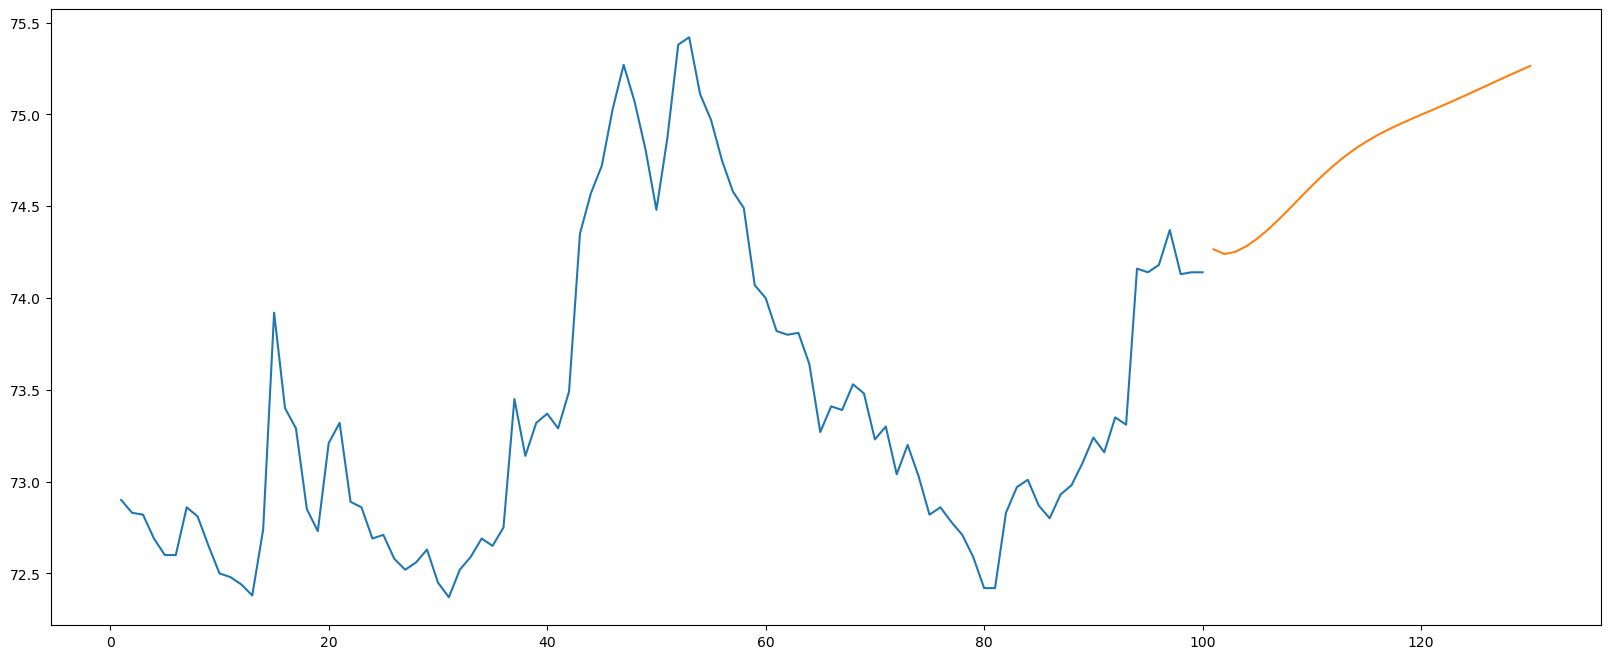

In [67]:
plt.figure(figsize=(20,8))
plt.plot(day_new,scaler.inverse_transform(df1[(len_val-100):]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show();

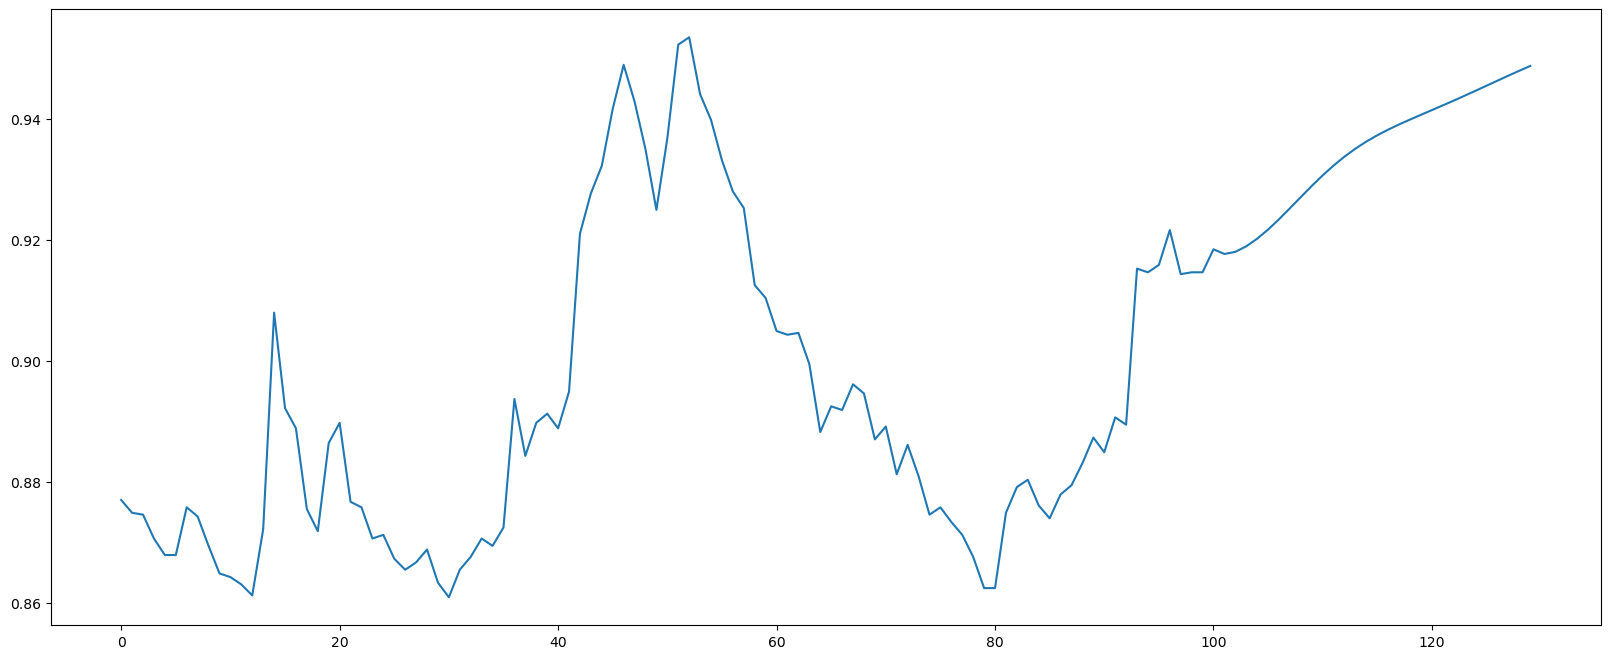

In [66]:
plt.figure(figsize=(20,8))
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[(len_val-100):])
plt.show();

In [64]:
op_res = scaler.inverse_transform(lst_output)
print(op_res)

[[74.2653227 ]
 [74.23962985]
 [74.25127934]
 [74.2815637 ]
 [74.32310904]
 [74.37296227]
 [74.42898657]
 [74.4888646 ]
 [74.55013775]
 [74.61053379]
 [74.6681612 ]
 [74.72166998]
 [74.77026544]
 [74.81372587]
 [74.85229065]
 [74.88655629]
 [74.91732531]
 [74.94552386]
 [74.97207222]
 [74.9977533 ]
 [75.02321068]
 [75.04888783]
 [75.07504179]
 [75.10173928]
 [75.12889984]
 [75.15633903]
 [75.18381747]
 [75.21105259]
 [75.23778736]
 [75.26381378]]
